# **Linear Regression:**
Linear Regression is a supervised machine learning algorithm used to model the relationship between a dependent variable and one or more independent variables by fitting a straight line to the data. It predicts continuous values by minimizing the difference between actual and predicted results.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Advertising Budget and Sales.csv')

In [ ]:
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
TV Ad Budget ($),0
Radio Ad Budget ($),0
Newspaper Ad Budget ($),0
Sales ($),0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
df.shape

(200, 4)

In [ ]:
df.rename(columns={'TV Ad Budget ($)':'Tv',	'Radio Ad Budget ($)':'Radio','Newspaper Ad Budget ($)':'Newspaper','Sales ($)':'Sales'},inplace=True)

In [ ]:
df.head()

,Tv,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<Axes: >

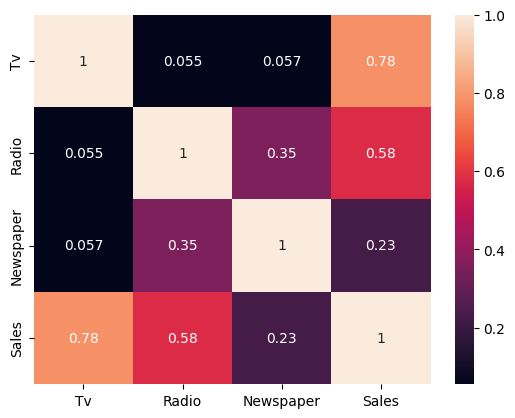

In [ ]:
sns.heatmap(df.corr(),annot=True)

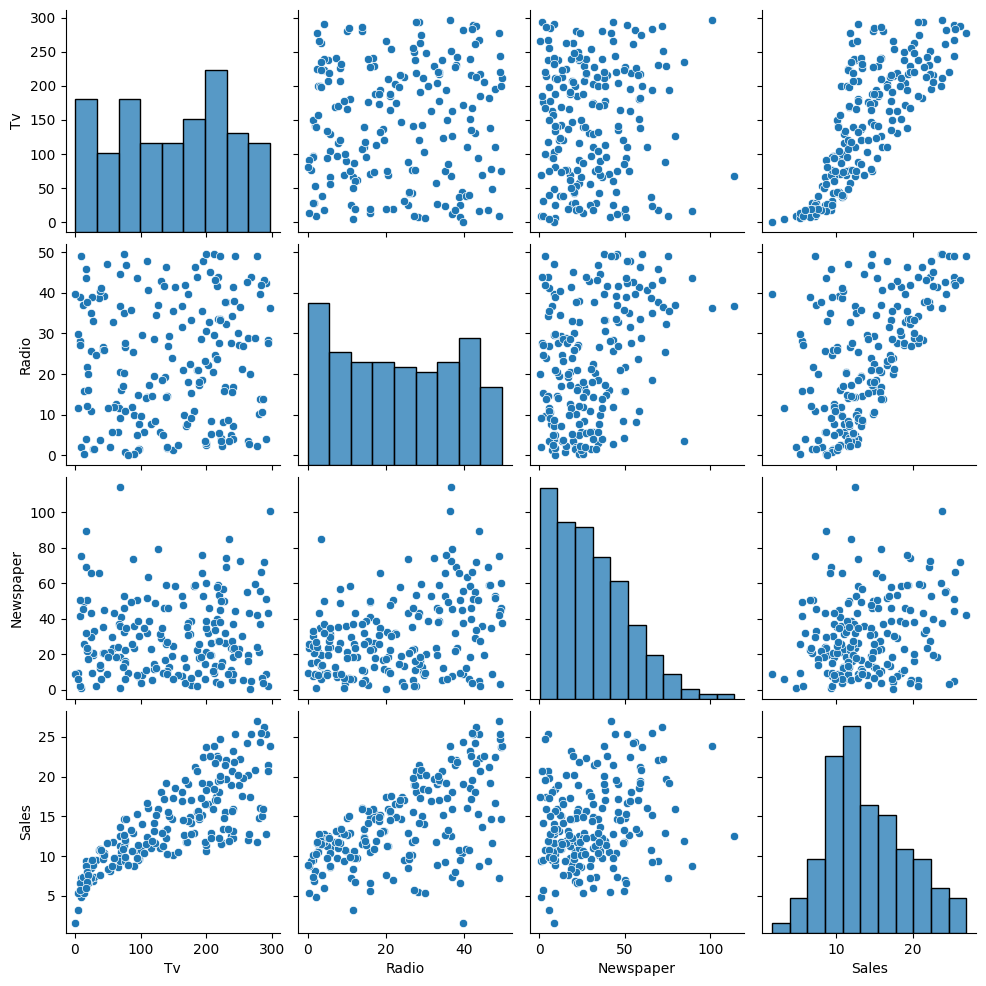

In [ ]:
sns.pairplot(data=df)

<Axes: >

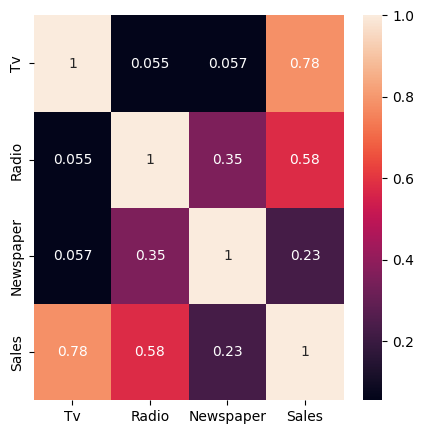

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)

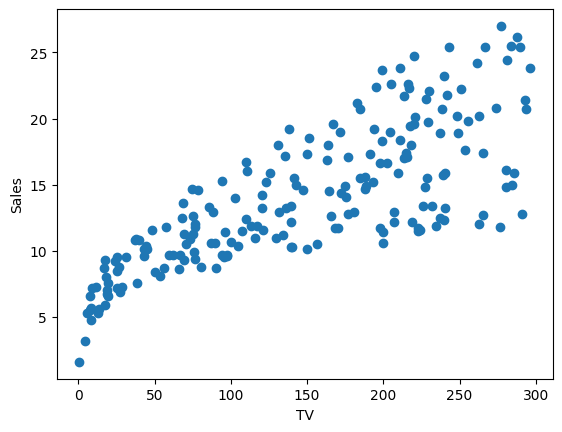

In [ ]:
plt.scatter(df['Tv'],df['Sales'])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [ ]:
x=df['Tv']
y=df['Sales']

In [ ]:
x.shape

(200,)

In [ ]:
x=x.values.reshape(200,1)
x.shape

(200, 1)

In [ ]:
y.shape

(200,)

In [ ]:
y=y.values.reshape(200,1)
y.shape

(200, 1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train

array([[116. ],
       [177. ],
       [ 43.1],
       [ 62.3],
       [224. ],
       [ 38.2],
       [ 70.6],
       [147.3],
       [104.6],
       [ 76.3],
       [ 78.2],
       [168.4],
       [  8.7],
       [  7.8],
       [ 76.4],
       [129.4],
       [ 73.4],
       [289.7],
       [ 19.6],
       [197.6],
       [284.3],
       [184.9],
       [112.9],
       [ 23.8],
       [290.7],
       [ 19.4],
       [293.6],
       [ 18.7],
       [134.3],
       [ 25.6],
       [100.4],
       [ 80.2],
       [188.4],
       [177. ],
       [125.7],
       [209.6],
       [142.9],
       [184.9],
       [222.4],
       [241.7],
       [ 17.2],
       [120.5],
       [ 89.7],
       [191.1],
       [ 75.5],
       [193.2],
       [ 85.7],
       [266.9],
       [ 39.5],
       [261.3],
       [ 13.2],
       [193.7],
       [296.4],
       [265.6],
       [214.7],
       [149.7],
       [131.7],
       [ 57.5],
       [240.1],
       [141.3],
       [180.8],
       [ 97.2],
       [

In [ ]:
lr=LinearRegression()

# Simple Linear Regression
when only one freature(x) and one target column(y)


In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)
y_pred

array([[14.71794394],
       [16.2115484 ],
       [20.74819743],
       [ 7.66403631],
       [17.37013877],
       [10.61402143],
       [17.2072847 ],
       [ 9.44612512],
       [17.46785121],
       [15.2669948 ],
       [ 8.58532504],
       [ 9.73460946],
       [18.03086098],
       [ 7.37089899],
       [13.61053628],
       [15.03899911],
       [ 7.45930549],
       [16.31391381],
       [10.62332738],
       [18.16579721],
       [17.79821232],
       [10.27435438],
       [ 8.88776831],
       [18.79394862],
       [10.33019006],
       [ 9.60897918],
       [17.05373658],
       [13.60123034],
       [11.17703121],
       [ 7.51048819],
       [16.41627922],
       [10.339496  ],
       [16.37440246],
       [ 7.90599093],
       [20.18053468],
       [18.203021  ],
       [ 9.36702457],
       [19.85482655],
       [12.57292322],
       [ 8.39920611]])

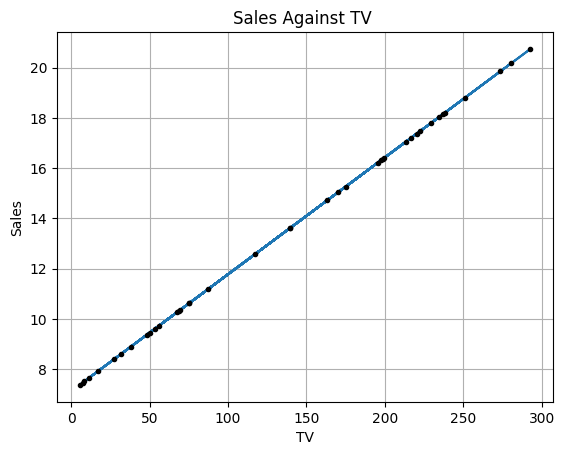

In [ ]:
plt.figure()
plt.title('Sales Against TV ')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.plot(x_test,y_pred)
plt.plot(x_test,y_pred,'k.')
plt.grid()
plt.show()

In [ ]:
for i, predictions in enumerate(y_pred):
  print('actual Price: %s  and  Predicted Price: %s' %(y_test[i],predictions))


actual Price: [16.9]  and  Predicted Price: [14.71794394]
actual Price: [22.4]  and  Predicted Price: [16.2115484]
actual Price: [21.4]  and  Predicted Price: [20.74819743]
actual Price: [7.3]  and  Predicted Price: [7.66403631]
actual Price: [24.7]  and  Predicted Price: [17.37013877]
actual Price: [12.6]  and  Predicted Price: [10.61402143]
actual Price: [22.3]  and  Predicted Price: [17.2072847]
actual Price: [8.4]  and  Predicted Price: [9.44612512]
actual Price: [11.5]  and  Predicted Price: [17.46785121]
actual Price: [14.9]  and  Predicted Price: [15.2669948]
actual Price: [9.5]  and  Predicted Price: [8.58532504]
actual Price: [8.7]  and  Predicted Price: [9.73460946]
actual Price: [11.9]  and  Predicted Price: [18.03086098]
actual Price: [5.3]  and  Predicted Price: [7.37089899]
actual Price: [10.3]  and  Predicted Price: [13.61053628]
actual Price: [11.7]  and  Predicted Price: [15.03899911]
actual Price: [5.5]  and  Predicted Price: [7.45930549]
actual Price: [16.6]  and  Pr

# Regression Matrices

* Mean Absolute Error
* Mean Square Error
* Root Mean Square Error
* R2 Score

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# y_test = actual values
# y_pred = model predictions

mae=mean_absolute_error(y_test,y_pred)

mse=mean_squared_error(y_test,y_pred)

r2=r2_score(y_test,y_pred)


print("MAE",mae)
print("MSE",mse)
print("R2_Score",r2)

MAE 2.444420003751042
MSE 10.204654118800956
R2_Score 0.6766954295627076


# Multi-Linear Regression
when more than one freatures(x) as an input and one target column(y)


In [ ]:
df.head()

,Tv,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
x=df.drop('Sales',axis=1)
y=df['Sales']

In [ ]:
x

,Tv,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_predict=lr.predict(x_test)
y_predict

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [ ]:
y_predict.shape

(40,)

In [ ]:
y_predict=y_predict.reshape(40,1)

In [ ]:
for i, prediction in enumerate(y_predict):
  print('Actual : %s and predicated: %s'%(y_test.iloc[i],prediction))

Actual : 16.9 and predicated: [16.4080242]
Actual : 22.4 and predicated: [20.88988209]
Actual : 21.4 and predicated: [21.55384318]
Actual : 7.3 and predicated: [10.60850256]
Actual : 24.7 and predicated: [22.11237326]
Actual : 12.6 and predicated: [13.10559172]
Actual : 22.3 and predicated: [21.05719192]
Actual : 8.4 and predicated: [7.46101034]
Actual : 11.5 and predicated: [13.60634581]
Actual : 14.9 and predicated: [15.15506967]
Actual : 9.5 and predicated: [9.04831992]
Actual : 8.7 and predicated: [6.65328312]
Actual : 11.9 and predicated: [14.34554487]
Actual : 5.3 and predicated: [8.90349333]
Actual : 10.3 and predicated: [9.68959028]
Actual : 11.7 and predicated: [12.16494386]
Actual : 5.5 and predicated: [8.73628397]
Actual : 16.6 and predicated: [16.26507258]
Actual : 11.3 and predicated: [10.27759582]
Actual : 18.9 and predicated: [18.83109103]
Actual : 19.7 and predicated: [19.56036653]
Actual : 12.5 and predicated: [13.25103464]
Actual : 10.9 and predicated: [12.33620695]
A

In [ ]:
# y_test = actual values
# y_pred = model predictions

mae=mean_absolute_error(y_test,y_predict)

mse=mean_squared_error(y_test,y_predict)

r2=r2_score(y_test,y_predict)


print("MAE",mae)
print("MSE",mse)
print("R2_Score",r2)

MAE 1.4607567168117603
MSE 3.1740973539761033
R2_Score 0.899438024100912


# Polynomial Linear Regression
use when data set shows non-Linear relationship

In [ ]:
poly_freature=PolynomialFeatures(degree=2)

In [ ]:
x_train=poly_freature.fit_transform(x_train)
x_test=poly_freature.fit_transform(x_test)

In [ ]:
pr=LinearRegression()

In [ ]:
pr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pre=pr.predict(x_test)
y_pre

array([16.66420162, 22.28734721, 20.18533065,  6.94528206, 24.74205604,
       13.20222352, 22.56436628,  8.99514643, 11.93724448, 15.23239813,
        7.65961049,  8.83227503, 13.23275262,  4.39155755, 10.19277514,
       11.91098714,  5.92736947, 16.29404139, 11.38241644, 18.96371898,
       20.15332835, 15.36441175, 10.09093859, 22.47671788,  9.49331383,
        8.36341428, 22.07465821, 12.5261968 , 10.73191839,  4.28137172,
       11.25229485, 11.07202623, 23.1431862 , 10.09912253, 15.55165356,
       20.94200863, 11.76180739, 20.28878887, 11.92186048,  6.7135029 ])

In [ ]:
for i, prediction in enumerate(y_pre):
  print('Actual : %s and predicated: %s'%(y_test.iloc[i],prediction))

Actual : 16.9 and predicated: 16.664201624324463
Actual : 22.4 and predicated: 22.287347208028578
Actual : 21.4 and predicated: 20.18533064594808
Actual : 7.3 and predicated: 6.945282064458102
Actual : 24.7 and predicated: 24.742056040906633
Actual : 12.6 and predicated: 13.202223524968392
Actual : 22.3 and predicated: 22.564366277460124
Actual : 8.4 and predicated: 8.995146426243547
Actual : 11.5 and predicated: 11.93724448449209
Actual : 14.9 and predicated: 15.232398130073484
Actual : 9.5 and predicated: 7.659610488010749
Actual : 8.7 and predicated: 8.83227503383116
Actual : 11.9 and predicated: 13.232752616561655
Actual : 5.3 and predicated: 4.3915575483085645
Actual : 10.3 and predicated: 10.192775136917646
Actual : 11.7 and predicated: 11.910987139132796
Actual : 5.5 and predicated: 5.927369465010398
Actual : 16.6 and predicated: 16.294041392616325
Actual : 11.3 and predicated: 11.38241644488229
Actual : 18.9 and predicated: 18.963718979880582
Actual : 19.7 and predicated: 20.15

In [ ]:
# y_test = actual values
# y_pred = model predictions

mae=mean_absolute_error(y_test,y_pre)

mse=mean_squared_error(y_test,y_pre)

r2=r2_score(y_test,y_pre)


print("MAE",mae)
print("MSE",mse)
print("R2_Score",r2)

MAE 0.5442500036290536
MSE 0.6179511195551626
R2_Score 0.980422029112095
